In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

# Data_name  설정

In [2]:
data_name='son'


path='D:/parentsvoice_1.13.1/resources/datasets/'+data_name


file_list=os.listdir(path+'/meta_static')

In [3]:
len(file_list)

17095

In [4]:
class Data():
    
    
    def __init__(self,filename,sentences,train_yn,d_sentences,count_tokens,e_count_tokens,count_leads,count_vowels,count_tails,count_puc):
        
        # 파일명
        self.filename=filename
        # 문장
        self.sentences=sentences
        # 데이터 가용 (train시 사용 여부 ) tokens와 n_frames의 제약 조건
        self.train_yn=train_yn
        # 상세 문장
        self.d_sentences=d_sentences
        # 토큰 총 갯수
        self.count_tokens=count_tokens
        # 토큰 별 갯수
        self.e_count_tokens=e_count_tokens
        # count 초성
        self.count_leads=count_leads
        # count 중성
        self.count_vowels=count_vowels
        # count 종성
        self.count_tails=count_tails
        # count 특수문자
        self.count_puc=count_puc
        
        
        
        
        

In [5]:
data_list=[]

for i in file_list:
    with open(os.path.join(path,'meta_static',i),encoding='utf-8') as f:
        json_data=json.load(f)
        # train에 사용되는 데이터만 가져옴
        if json_data['데이터 가용']:
            data_list.append(
                Data(
                    json_data['파일명'],json_data['문장'],json_data['데이터 가용'],
                    json_data['상세 문장'],json_data['토큰 총 갯수'],json_data['토큰 별 갯수'],
                    json_data['초성'],json_data['중성'],json_data['종성'],json_data['특수문자']
                ))
        

In [6]:
# tokens가 너무 작거나 음성 파일의 크기가 너무 작거나 커서 train에 사용되지 못하는 데이터 갯수


print('tokens가 너무 작거나 음성 파일의 크기가 너무 작거나 커서 train에 사용되지 못하는 데이터 갯수와 비율 : {}개 / {} ' .format(len(file_list)-len(data_list),((len(file_list)-len(data_list))/len(file_list))*100))

tokens가 너무 작거나 음성 파일의 크기가 너무 작거나 커서 train에 사용되지 못하는 데이터 갯수와 비율 : 0개 / 0.0 


In [7]:
def find_max_sentences(list_name):
    max_tokens=len(list_name[0].sentences)
    for i in list_name:
        if len(i.sentences)>=max_tokens:
            max_tokens=len(i.sentences)
            
    return max_tokens
        
    
    

In [8]:
def find_max_tokens(list_name):
    max_tokens=list_name[0].count_tokens
    for i in list_name:
        if i.count_tokens>=max_tokens:
            max_tokens=i.count_tokens
            
    return max_tokens
        
    

In [9]:
def count_delete_data(data_list,num):
    count=0
    
    for i in data_list:
        if i.count_tokens>=num:
            count+=1
            
#             print(i.filename)
            
    return count

In [10]:
# train_yn중에 max tokens 구하기
find_max_tokens(data_list)

        

199

In [11]:
find_max_sentences(data_list)

91

In [12]:
count_delete_data(data_list,125)

184

In [13]:
len(file_list)

17095

In [14]:
count_tokens_list=[i.count_tokens for i in data_list ]

(array([6.879e+03, 5.164e+03, 2.745e+03, 1.361e+03, 6.000e+02, 2.270e+02,
        8.200e+01, 2.600e+01, 1.000e+01, 1.000e+00]),
 array([ 30. ,  46.9,  63.8,  80.7,  97.6, 114.5, 131.4, 148.3, 165.2,
        182.1, 199. ]),
 <a list of 10 Patch objects>)

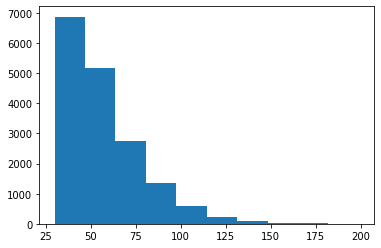

In [15]:
plt.hist(count_tokens_list)

In [31]:
total_df=pd.DataFrame()

In [34]:
data_name_own='son_own_slience_2'


path_own='D:/parentsvoice_1.13.1/resources/datasets/'+data_name_own


file_list_own=os.listdir(path_own+'/meta_static')

data_list_own=[]

for i in file_list_own:
    with open(os.path.join(path_own,'meta_static',i),encoding='utf-8') as f:
        json_data=json.load(f)
        total_df=total_df.append(json_data,ignore_index=True)
        # train에 사용되는 데이터만 가져옴
        '''
        if json_data['데이터 가용']:
            data_list_own.append(
                Data(
                    json_data['파일명'],json_data['문장'],json_data['데이터 가용'],
                    json_data['상세 문장'],json_data['토큰 총 갯수'],json_data['토큰 별 갯수'],
                    json_data['초성'],json_data['중성'],json_data['종성'],json_data['특수문자']
                ))
        '''
        

In [38]:
total_df.to_csv("son_own_total.csv",encoding='utf-8-sig')

In [20]:
len(data_list_own)

20066

In [21]:
count_tokens_list=[i.count_tokens for i in data_list_own ]

(array([3.379e+03, 7.279e+03, 5.036e+03, 2.827e+03, 9.990e+02, 3.900e+02,
        1.110e+02, 3.300e+01, 1.000e+01, 2.000e+00]),
 array([  3. ,  42.6,  82.2, 121.8, 161.4, 201. , 240.6, 280.2, 319.8,
        359.4, 399. ]),
 <a list of 10 Patch objects>)

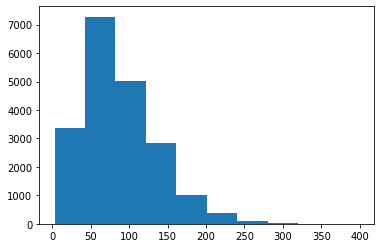

In [22]:
plt.hist(count_tokens_list)

In [24]:
count_delete_data(data_list_own,125)

4082

# json to DF

In [25]:
# 파일 하나씩 돌며, 한문장씩 dataframd에 추가 

total_df=pd.DataFrame()

In [ ]:
for i in data_list_own:
    
    
    json_data['파일명'],json_data['문장'],json_data['데이터 가용'],
                    json_data['상세 문장'],json_data['토큰 총 갯수'],json_data['토큰 별 갯수'],
                    json_data['초성'],json_data['중성'],json_data['종성'],json_data['특수문자']
    